<a href="https://colab.research.google.com/github/fadhan654/MachineLearning/blob/main/Evaluate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from scipy.spatial import distance

In [21]:
# Memuat dataset Iris
iris = load_iris()
X = iris.data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


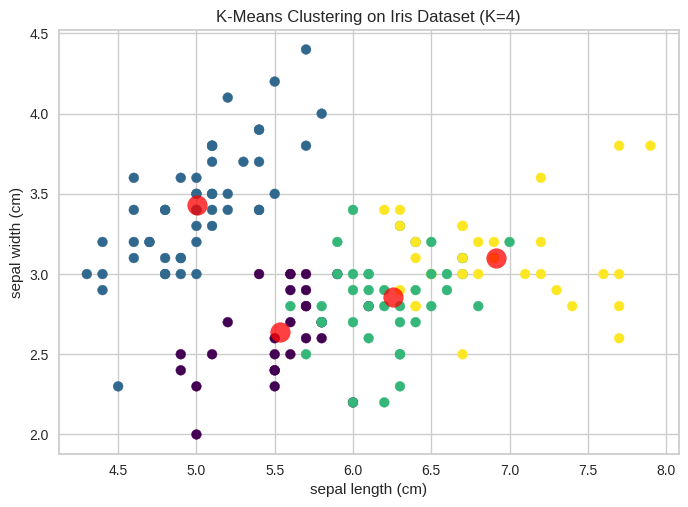

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


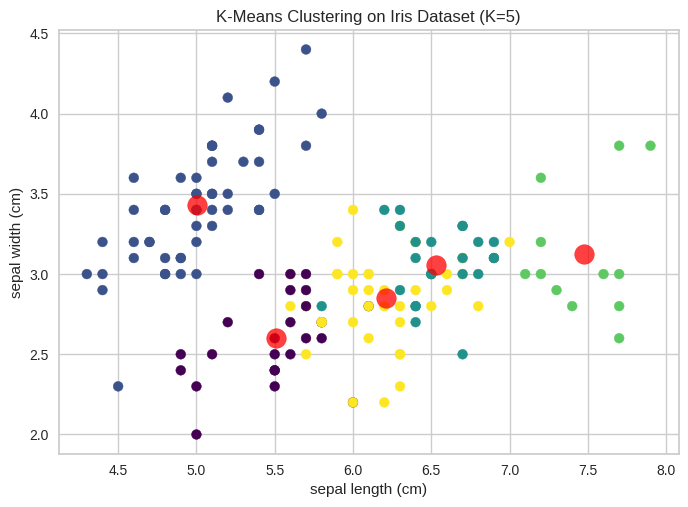

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


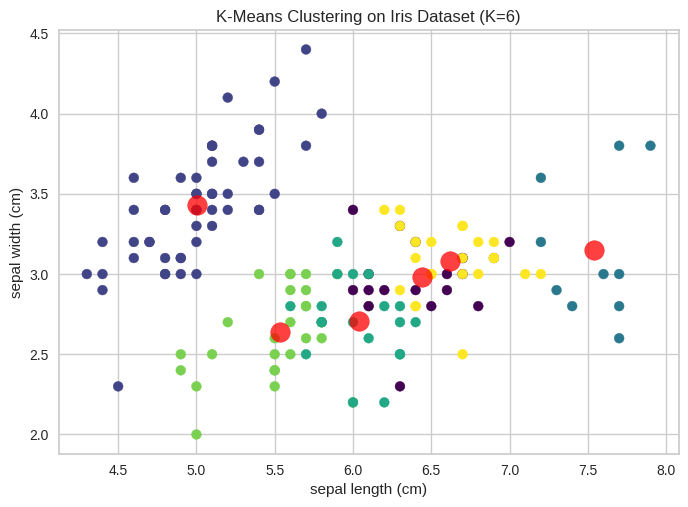

In [22]:

# Looping untuk mencoba beberapa nilai k pada KMeans
for k in range(4, 7):
    # KMeans clustering
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)

    # Memvisualisasikan hasil clustering
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

    # Menampilkan pusat cluster (centroid)
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)

    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title(f'K-Means Clustering on Iris Dataset (K={k})')
    plt.show()


In [23]:
# Import library yang diperlukan
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [24]:
# Generate some sample data
X, _ = make_blobs(n_samples=100, centers=3, cluster_std=0.60, random_state=0)
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

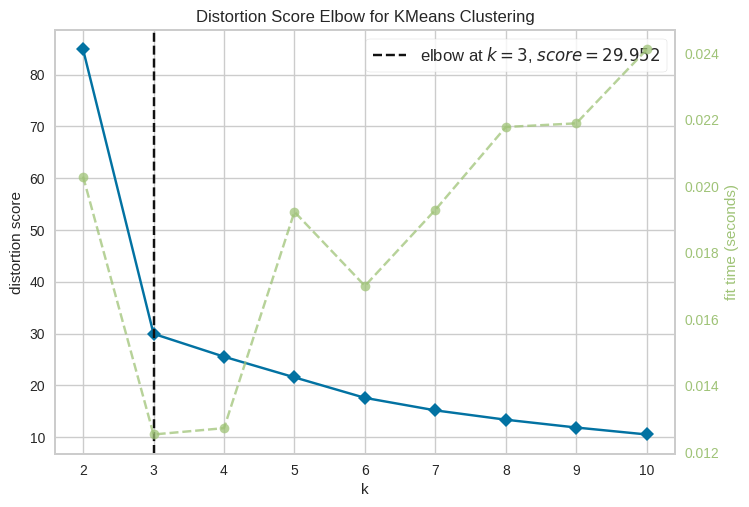

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
# Elbow Method to determine the optimal number of clusters
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 11), metric='distortion')
visualizer.fit(X_scaled)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


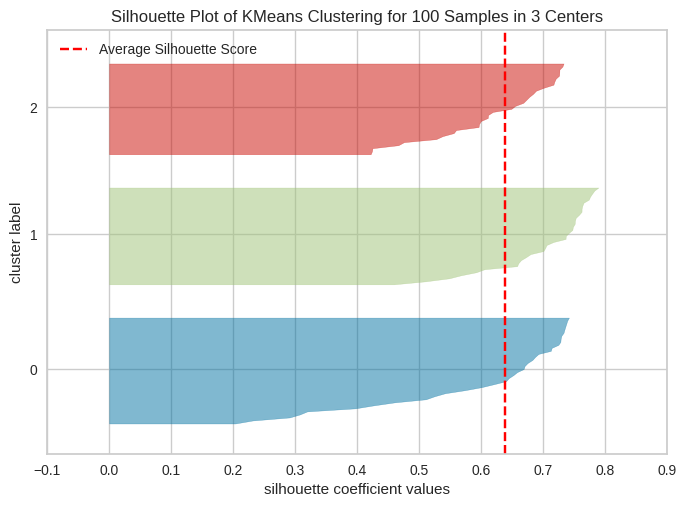

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 100 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [26]:
# Silhouette Visualizer
visualizer = SilhouetteVisualizer(KMeans(3, random_state=0), colors='yellowbrick')
visualizer.fit(X_scaled)
visualizer.show()

In [27]:
# KMeans clustering with optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

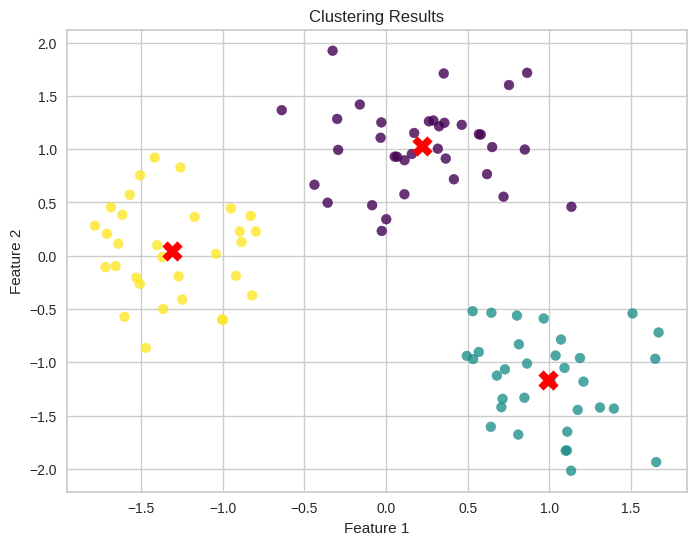

In [28]:
# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title('Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [29]:
# Evaluate clustering using Silhouette Score
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.6376874711002073


In [30]:
# Evaluate clustering using Sum of Squared Errors (SSE)
sse = np.sum((X_scaled - kmeans.cluster_centers_[kmeans.labels_]) ** 2)
print(f'SSE: {sse}')

SSE: 29.952103518055043


In [31]:
# Evaluate clustering using Davies-Bouldin Index
db_index = davies_bouldin_score(X_scaled, kmeans.labels_)
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.5030157607233714


In [32]:
# Evaluate clustering using Calinski-Harabasz Index (Chi)
calinski_harabasz_index = calinski_harabasz_score(X_scaled, kmeans.labels_)
print(f'Calinski-Harabasz Index: {calinski_harabasz_index}')

Calinski-Harabasz Index: 275.35037645696127


In [33]:
# Dunn Index
def dunn_index(X, labels):
    min_inter_cluster_distance = np.inf
    max_intra_cluster_diameter = -np.inf
    for i in np.unique(labels):
        cluster_points_i = X[labels == i]
        max_intra_cluster_diameter = max(max_intra_cluster_diameter, np.max(distance.pdist(cluster_points_i)))
        for j in np.unique(labels):
            if i != j:
                cluster_points_j = X[labels == j]
                min_inter_cluster_distance = min(min_inter_cluster_distance, np.min(distance.cdist(cluster_points_i, cluster_points_j)))
    dunn = min_inter_cluster_distance / max_intra_cluster_diameter
    return dunn

dunn = dunn_index(X_scaled, kmeans.labels_)
print(f'Dunn Index: {dunn}')

Dunn Index: 0.23588440285523632
